:::{.callout-caution}
## 注意

Quarto は最近公開されたばかりで開発中なので**ここの記述もすぐ時代遅れになる可能性がある**ことに注意してほしい.

:::

In [ ]:
#| echo: false
#| message: false
!pip install jupyterlab-katex
!pip install pandas plotnine
!pip install vega-datasets altair

# Markdown の確認

1. 番号付きの
1. 箇条書き
    1. ネストも
    1. できる

## 数式表示

ブラック=ショールズ方程式 (@eq-black-scholes)

$$
\frac{\partial \mathrm C}{ \partial \mathrm t } + \frac{1}{2}\sigma^{2} \mathrm S^{2}
\frac{\partial^{2} \mathrm C}{\partial \mathrm C^2}
  + \mathrm r \mathrm S \frac{\partial \mathrm C}{\partial \mathrm S}\ =
  \mathrm r \mathrm C 
$$ {#eq-black-scholes}

# テキスト出力の確認

In [2]:
!python --version 

Python 3.9.6


In [3]:
1 + 1

2

# コード実行と実行オプションの動作確認

Matplotlib 公式の用例^[<https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py>] から作成した @fig-mpl を見よ. コードは長いので HTML 版では折りたたみ, PDF 版では非表示とした.

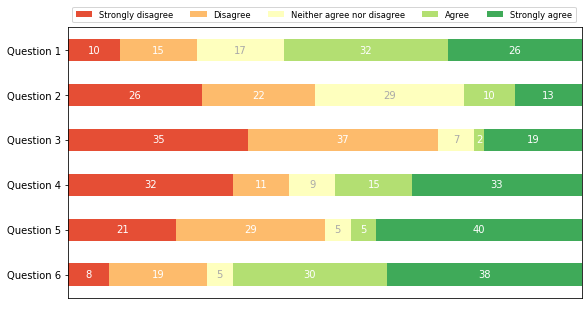

In [4]:
#| label: fig-mpl
#| fig-cap: "matplotlib のコードはとても長い"
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

Plotnine で作成した @fig-plotnine を見よ.

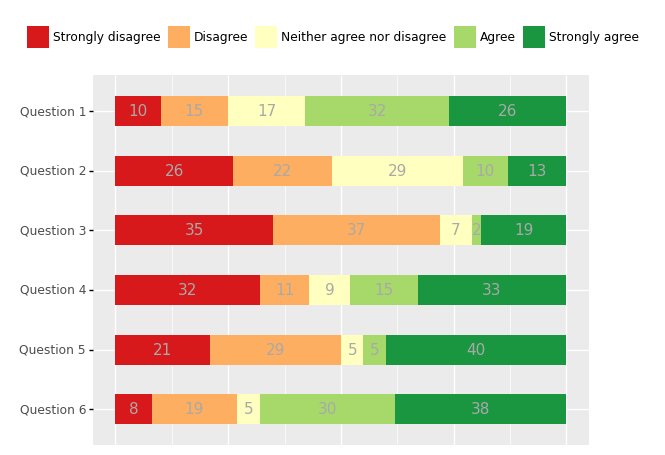

In [5]:
#| label: fig-plotnine
#| fig-cap: "Plotnine で同等のグラフを作成"

from plotnine import *
import pandas as pd
d = pd.DataFrame(results).assign(
    cat=pd.Categorical(category_names, category_names),
).melt(id_vars="cat").assign(
    variable=lambda d: pd.Categorical(d['variable'], list(reversed(results.keys())))
)

(
    ggplot(d, aes("variable", "value", group="cat", fill="cat", label="value")
    ) +
    geom_col(width = .5) + geom_text(position = position_stack(vjust=.5), color="darkgrey") +
    coord_flip() + scale_y_reverse() +
    scale_fill_brewer("div", "RdYlGn") +
    theme(axis_title=element_blank(), axis_text_x=element_blank(), axis_ticks_major_x=element_blank(),
          legend_position='top', legend_title=element_blank())
).draw();

しかし, @fig-alt のように Altair は表示されない? 公式の用例^[<https://jjallaire.github.io/visualization-curriculum/altair_introduction.html>]はいろいろと設定が必要そう

In [6]:
#| label: fig-alt
#| fig-cap: "Altair を使用したインタラクティブなグラフ"

import altair as alt
from vega_datasets import data
cars = data.cars()
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin'] # show Name and Origin in a tooltip
).interactive()

alt.Chart(...)

# 表の表示

@tbl-table1 を見よ. 現時点では pandas データフレームの表示を表として相互参照できない?

In [7]:
#| label: tbl-table1
#| tbl-cap: "pandas データフレームを表として掲載"
#| echo: false

d

,cat,variable,value
0,Strongly disagree,Question 1,10
1,Disagree,Question 1,15
2,Neither agree nor disagree,Question 1,17
3,Agree,Question 1,32
4,Strongly agree,Question 1,26
5,Strongly disagree,Question 2,26
6,Disagree,Question 2,22
7,Neither agree nor disagree,Question 2,29
8,Agree,Question 2,10
9,Strongly agree,Question 2,13


# 文献引用

[@R-quarto], @R-rmdja 